In [ ]:
!pip install missingno
!pip install fancyimpute

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import fancyimpute 
from scipy.stats import norm, ks_2samp
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### <font color='Indigo'> load data after EDA stage

In [3]:
df=pd.read_pickle(r'C:\Course\Repo\Fraud detection\Files\df_model_data_after_EDA_12.3.25.pkl')

In [4]:
df.head()

,ssn,cc_num,gender,state,zip,city_pop,job,acct_num,profile,trans_num,...,unix_time,category,amt,is_fraud,distance_km,age,trans_month,trans_day,is_weekend,trans_time_group
0,535472702,4198272606576824,1,GA-NC-SC,28217,790689,Transportation & Logistics Workers,185813831547,adults 2550 female urban,1ecc217ab8492865f9f03ea0d0c6037c,...,1592153925,health_fitness,10.04,0,131,41,6,14,1,Night
1,894080219,30498900618026,0,IL-OH,44105,769341,Engineering & Technical Experts,680183003149,adults 2550 male urban,1f5042228156493861039712c8965fa1,...,1592580498,health_fitness,100.13,0,63,42,6,19,0,Evening
2,343803207,4096677411473722879,1,TN-KY-AL-LA-MS-AR,42539,10026,Legal & Policy Professionals,692904836534,adults 50up female urban,db39e60e3c192e0c8e2e3a59ee9c1cb8,...,1609348554,travel,80.55,0,64,79,12,30,0,Night
3,642331032,6011392339901501,1,CA,90035,2383912,Education & Research Professionals,830563888099,adults 50up female urban,9db5e5ca9e7ef7559ac7c4c6aabbe6cc,...,1589389452,health_fitness,42.78,0,41,56,5,13,0,Night
4,262052459,3519007422404262,0,IL-OH,45103,31485,Psychology & Social Service Workers,611408841710,adults 50up male urban,8fe9f00f60ae86938e2eede7399060d8,...,1582344254,food_dining,7.44,0,105,73,2,22,1,Morning


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ssn               300000 non-null  int32  
 1   cc_num            300000 non-null  int64  
 2   gender            300000 non-null  int32  
 3   state             300000 non-null  string 
 4   zip               300000 non-null  int64  
 5   city_pop          300000 non-null  int64  
 6   job               300000 non-null  string 
 7   acct_num          300000 non-null  int64  
 8   profile           300000 non-null  string 
 9   trans_num         300000 non-null  string 
 10  trans_time        300000 non-null  int32  
 11  unix_time         300000 non-null  int64  
 12  category          300000 non-null  string 
 13  amt               300000 non-null  float64
 14  is_fraud          300000 non-null  int64  
 15  distance_km       300000 non-null  int64  
 16  age               30

In [10]:
df.describe()

,ssn,cc_num,gender,zip,city_pop,acct_num,trans_time,unix_time,amt,is_fraud,distance_km,age,trans_month,trans_day,is_weekend
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,3.000000e+05,3.000000e+05,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,4.506491e+08,3.670804e+17,0.517723,51070.220327,2.971528e+05,4.971182e+11,16.767853,1.595274e+09,66.560503,0.005557,76.436283,41.721203,7.128747,15.870397,0.400180
std,2.601384e+08,1.229931e+18,0.499687,29651.824670,5.719462e+05,2.894862e+11,4.527871,9.053327e+06,199.455600,0.074336,29.238398,17.849832,3.420063,8.842372,0.489935
min,1.076840e+06,6.040003e+10,0.000000,1002.000000,4.400000e+01,1.837412e+07,0.000000,1.577817e+09,1.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000
25%,2.251791e+08,3.853209e+13,0.000000,27603.000000,1.770000e+04,2.451203e+11,14.000000,1.587906e+09,8.260000,0.000000,56.000000,28.000000,4.000000,8.000000,0.000000
50%,4.485947e+08,3.506336e+15,1.000000,48081.000000,6.089200e+04,4.957189e+11,17.000000,1.595434e+09,33.330000,0.000000,79.000000,39.000000,7.000000,16.000000,0.000000
75%,6.767600e+08,4.579304e+15,1.000000,78239.000000,2.368230e+05,7.501600e+11,20.000000,1.603363e+09,76.830000,0.000000,99.000000,53.000000,10.000000,24.000000,1.000000
max,8.999105e+08,4.999689e+18,1.000000,99929.000000,2.906700e+06,9.999583e+11,23.000000,1.609439e+09,22471.870000,1.000000,149.000000,93.000000,12.000000,31.000000,1.000000


# Outlier Detection

In [13]:
#Continues Numeric Columns
cols= ['city_pop','amt','distance_km', 'age']
con_df = df[cols]

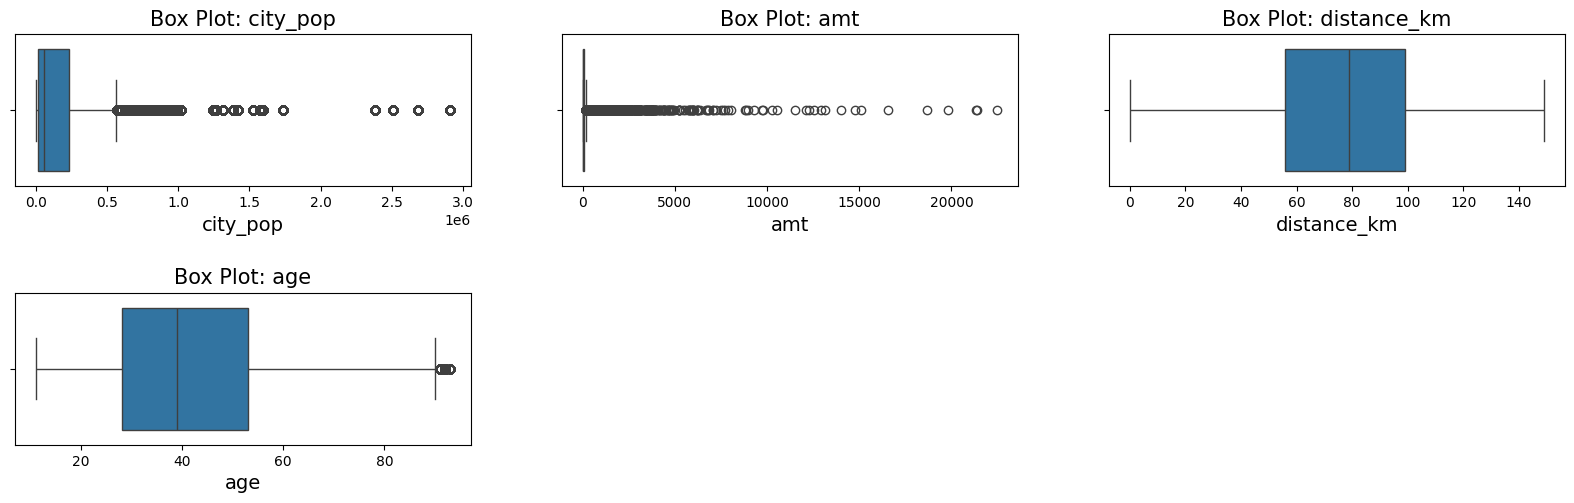

In [15]:
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(animals):
    for i, col in enumerate(animals.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=animals, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(con_df)

##  <font color='cyan'> Using Mathematical Functions

 #### <font color='Indigo'>IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [19]:
# Function to create a boolean mask for outliers in specified columns
def get_outlier_mask(df, columns):
    """
    Returns a DataFrame with True where outliers exist in the specified columns.

    Parameters:
    - df: Input DataFrame
    - columns: List of columns to check for outliers

    Returns:
    - outlier_mask: Boolean DataFrame where True indicates an outlier
    """
    outlier_mask = pd.DataFrame(False, index=df.index, columns=columns)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        outlier_mask[col] = (df[col] > upper_limit) | (df[col] < lower_limit)
    return outlier_mask

# Correlation comparison function
def cocor(x1, y1, x2, y2):
    """
    Compares correlation coefficients using Fisher's z-transformation.

    Parameters:
    - x1, y1: First pair of variables (e.g., full data)
    - x2, y2: Second pair of variables (e.g., data without outliers)

    Returns:
    - z: Z-score of the difference
    - p: Two-tailed p-value
    """
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1) / (1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2) / (1 - xy2))
    se_diff_r = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

# Main function to set outliers to NaN in specified columns only
def handle_outliers(df, columns_to_handle, target_col='is_fraud'):
    """
    Sets outliers to NaN only in the specified columns, leaving other columns unchanged.

    Parameters:
    - df: Input DataFrame
    - columns_to_handle: List of columns where outliers should be set to NaN
    - target_col: Name of the target column (default: 'is_fraud')

    Returns:
    - manipulated_data: DataFrame with outliers set to NaN in specified columns
    """
    # Ensure target_col is not in columns_to_handle
    columns_to_handle = [col for col in columns_to_handle if col != target_col]
    
    # Get outlier mask for specified columns
    outlier_mask = get_outlier_mask(df, columns=columns_to_handle)
    
    # Analyze all numeric columns except target for reporting purposes
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target_col, errors='ignore')
    out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
    rows = []
    
    for col in numeric_cols:
        full_data = df[col]
        target_full = df[target_col]
        
        # Non-outlier data (only if col is in columns_to_handle)
        if col in columns_to_handle:
            non_outlier_rows = ~outlier_mask[col]
        else:
            non_outlier_rows = pd.Series(True, index=df.index)  # No outliers removed
        
        non_outlier_data = df[col][non_outlier_rows]
        target_non_outlier = df[target_col][non_outlier_rows]
        
        # Correlation test
        _, pvalue = cocor(full_data, target_full, non_outlier_data, target_non_outlier)
        corr_change = '+' if pvalue < 0.05 else '-'
        
        # Distribution test
        dist_pval = ks_2samp(full_data, non_outlier_data)[1]
        dist_change = '+' if dist_pval < 0.05 else '-'
        
        # Count outliers (only for columns_to_handle)
        outliers_count = outlier_mask[col].sum() if col in columns_to_handle else 0
        
        rows.append({
            'feature': col,
            'outliers_cnt': outliers_count,
            'distribution_changed': dist_change,
            'correlation_changed': corr_change
        })
    
    # Compile analysis results
    out_df = pd.DataFrame(rows)
    
    # Decision logic: Handle outliers unless both correlation and distribution change
    out_df['handle_outliers'] = 'yes'
    out_df.loc[(out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '+'), 'handle_outliers'] = 'no'
    
    # Only handle outliers in columns_to_handle where decision is 'yes'
    handle_outliers_cols = [col for col in columns_to_handle if out_df.loc[out_df['feature'] == col, 'handle_outliers'].values[0] == 'yes']
    
    # Create manipulated_data by setting outliers to NaN only in specified columns
    manipulated_data = df.copy()
    for col in handle_outliers_cols:
        manipulated_data.loc[outlier_mask[col], col] = np.nan
    
    # Report the changes
    print(f"Columns where outliers were set to NaN: {handle_outliers_cols}")
    for col in handle_outliers_cols:
        num_na = manipulated_data[col].isna().sum()
        print(f"Column '{col}': {num_na} values set to NaN")
    print("\nAnalysis Results:")
    print(out_df)
    
    return manipulated_data

In [21]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in con_df:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(con_df).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
city_pop,48683.0,16.227667
amt,16857.0,5.619000
age,1987.0,0.662333


##### <font color='orange'>  Although there are outliers in the number of residents  **city_pop**, I chose to keep the data unchanged. I believe it’s important to distinguish between large cities with populations over a million and smaller cities when analyzing fraud. Removing these values could reduce the model’s ability to capture important patterns and ultimately harm its predictive performance.

Crearting df_outliers with dummies

In [30]:
# Specify columns to handle outliers
columns_to_handle = ['amt','distance_km', 'age']
    
# Apply the outlier handling
cleaned_df = handle_outliers(df, columns_to_handle=columns_to_handle, target_col='is_fraud')
print("\nOriginal DataFrame:")
print(df)
print("\nDataFrame with outliers set to NaN in specified columns:")
print(cleaned_df)

Columns where outliers were set to NaN: ['distance_km', 'age']
Column 'distance_km': 0 values set to NaN
Column 'age': 1987 values set to NaN

Analysis Results:
        feature  outliers_cnt distribution_changed correlation_changed  \
0           ssn             0                    -                   -   
1        cc_num             0                    -                   -   
2        gender             0                    -                   -   
3           zip             0                    -                   -   
4      city_pop             0                    -                   -   
5      acct_num             0                    -                   -   
6    trans_time             0                    -                   -   
7     unix_time             0                    -                   -   
8           amt         16857                    +                   +   
9   distance_km             0                    -                   -   
10          age          

creating df without ouliers so we can compare the corr and distribution in both datasets

<Axes: >

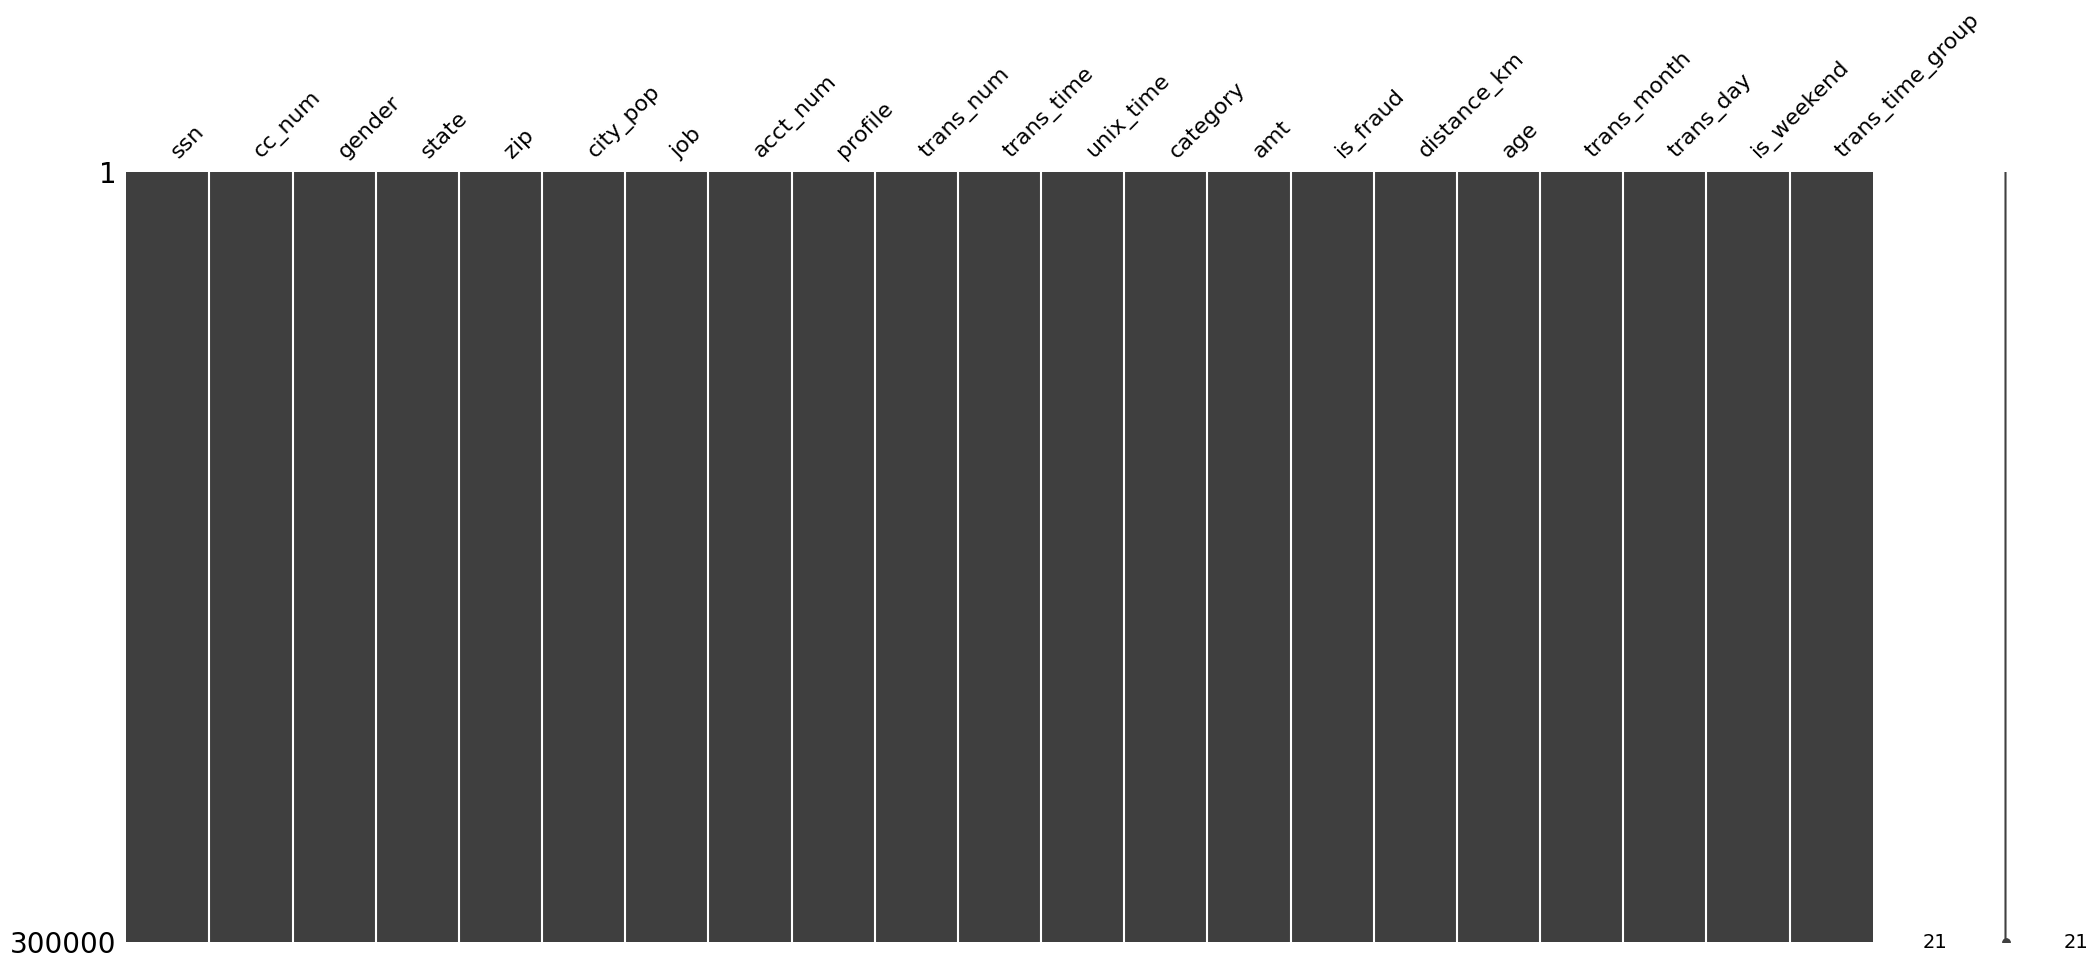

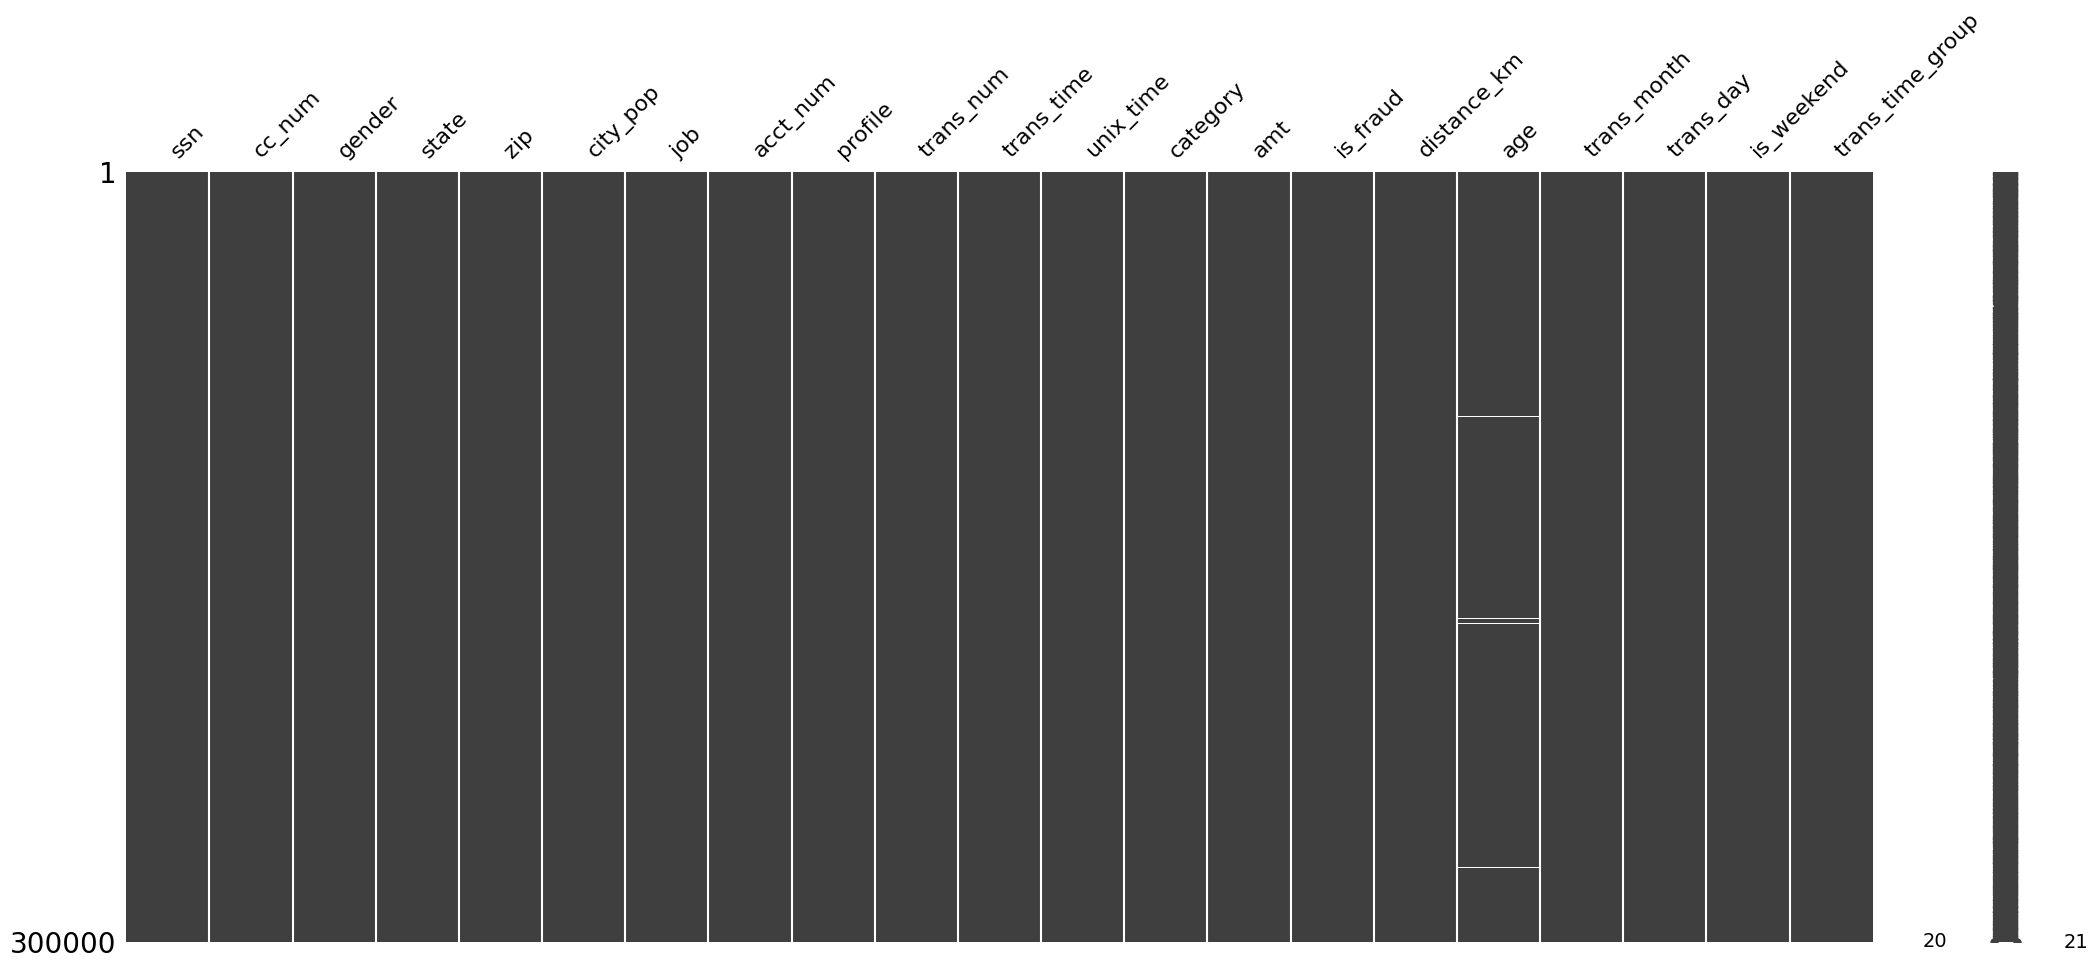

In [32]:
msno.matrix(df)
msno.matrix(cleaned_df)

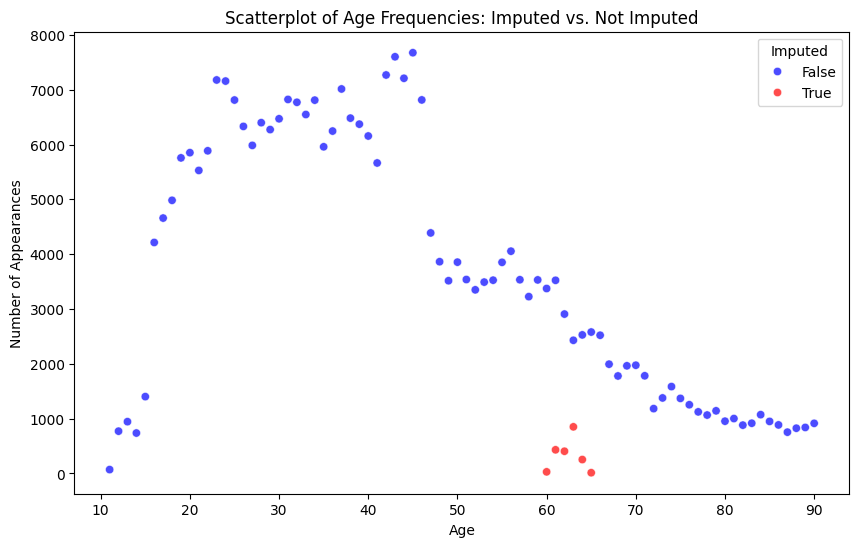

    age  is_imputed  count
0  11.0       False     71
1  12.0       False    772
2  13.0       False    945
3  14.0       False    738
4  15.0       False   1402


In [35]:
# Create a copy of the cleaned DataFrame to store imputed values
df_filled = cleaned_df.copy()

# Identify rows where 'age' is originally missing
original_missing = df_filled['age'].isna()

# Select columns to use as predictors for imputing 'age', including 'age' itself
relevant_columns = [
    'state', 'job', 'profile', 'category', 'trans_time_group',
    'gender', 'city_pop', 'amt', 'distance_km', 'trans_month', 'trans_day', 'is_weekend', 'age'
]
df_relevant = df_filled[relevant_columns]

# One-hot encode categorical columns for the MICE imputation process
df_encoded = pd.get_dummies(df_relevant, columns=['state', 'job', 'profile', 'category', 'trans_time_group'], dummy_na=True)

# Initialize the iterative imputer (MICE)
imputer = IterativeImputer(max_iter=10, random_state=0)

# Impute missing values in the encoded DataFrame
df_imputed_array = imputer.fit_transform(df_encoded)

# Convert the imputed array back to a DataFrame with original column names
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns)

# Extract the imputed 'age' values
age_imputed = df_imputed['age']

# Update the copied DataFrame with the imputed 'age' values
df_filled['age'] = age_imputed

# Add a column indicating which 'age' values were imputed (True for imputed, False for original)
df_filled['is_imputed'] = original_missing

# Optional: Round the 'age' values to integers
df_filled['age'] = df_filled['age'].round()

# Group the DataFrame by age and imputation status to count frequencies
age_counts = df_filled.groupby(['age', 'is_imputed']).size().reset_index(name='count')

# Create a scatterplot:
#   - x-axis: age groups (individual ages)
#   - y-axis: frequency (number of appearances for each age)
#   - hue: differentiates imputed (True) vs. not imputed (False) ages
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age',
    y='count',
    hue='is_imputed',
    data=age_counts,
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.xlabel('Age')
plt.ylabel('Number of Appearances')
plt.title('Scatterplot of Age Frequencies: Imputed vs. Not Imputed')
plt.legend(title='Imputed')
plt.show()

# Display the first few rows of the aggregated age counts for verification
print(age_counts.head())

<Axes: >

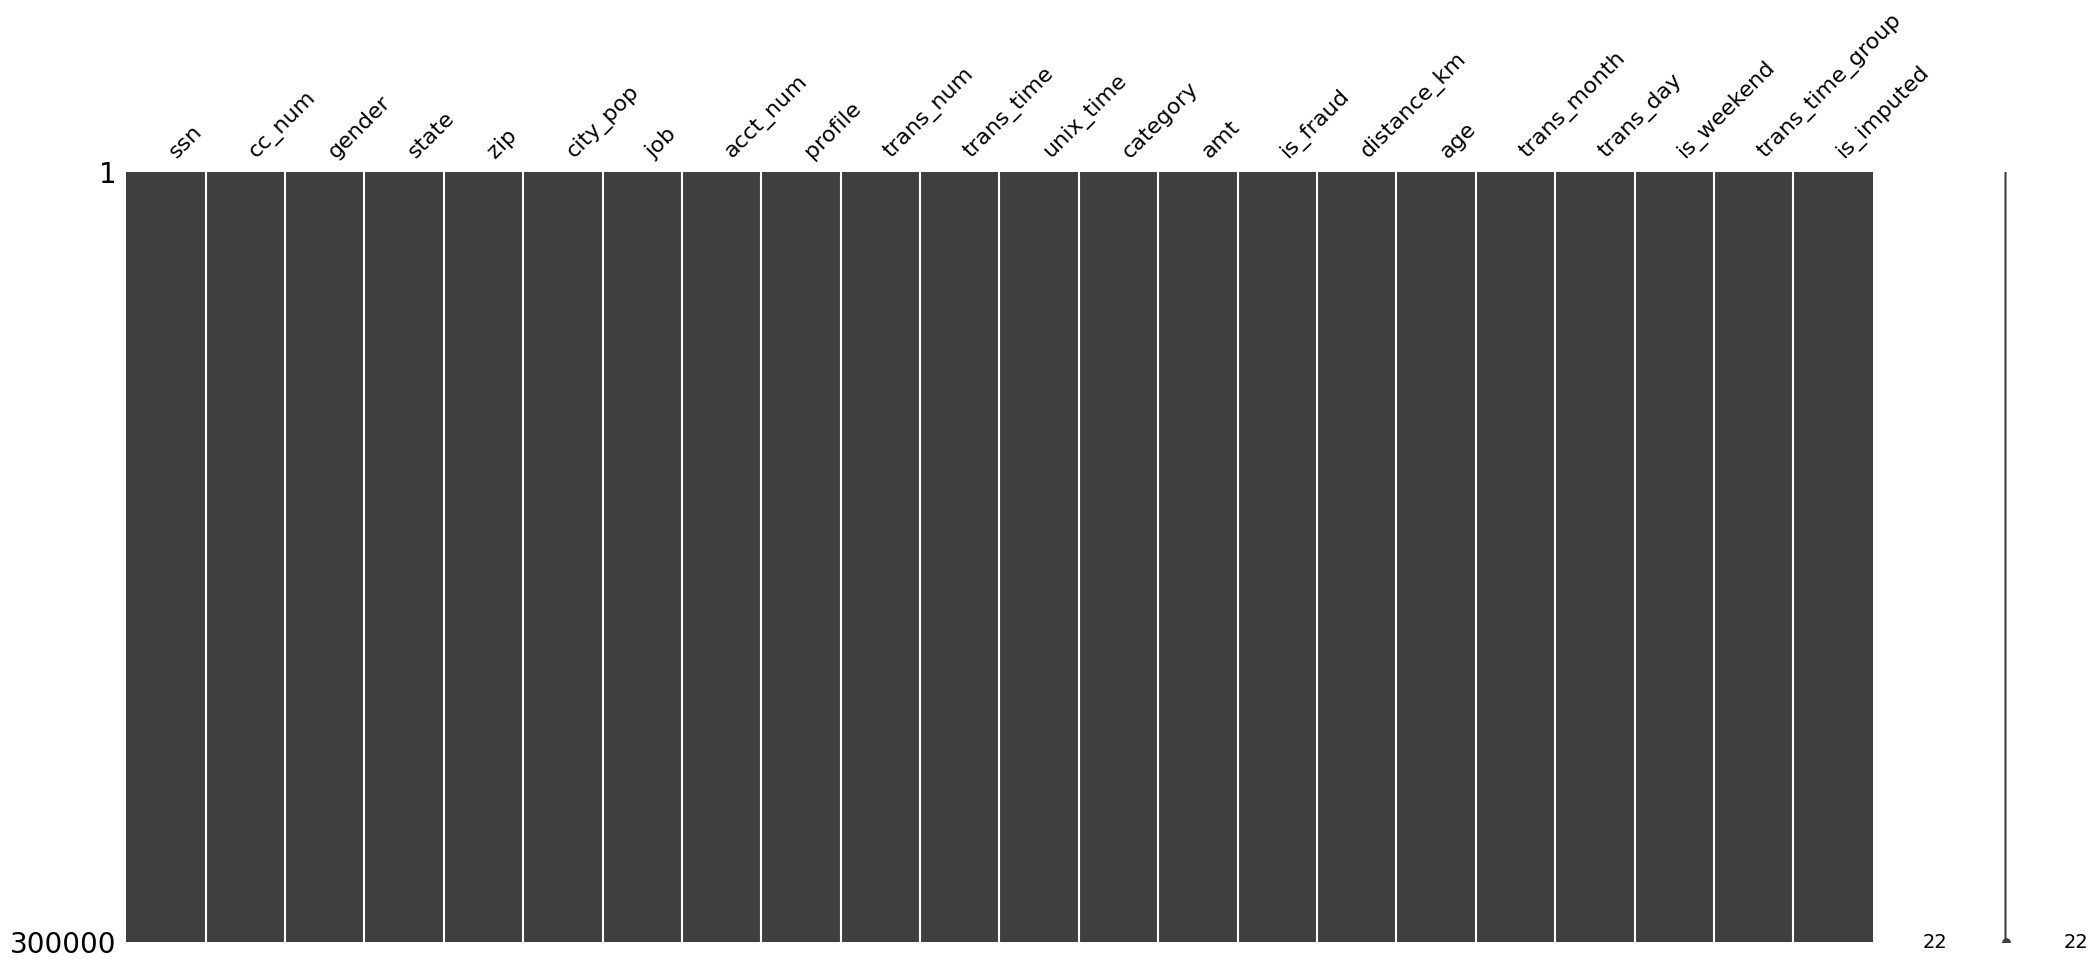

In [36]:
msno.matrix(df_filled)

## Pickle file

In [40]:
df.to_pickle(r'C:\Course\Repo\Fraud detection\Files\df_model_data_after_DataCleansing_21.3.25.pkl')

<br><br><br>
#<font color='yellow'>  Credit Card Fraud Detection: Concise Data Cleansing Summary

## Dataset Overview
The dataset, containing **300,000 credit card transactions** with **21 features**, underwent initial inspection to check structure and statistics, ensuring **no missing values initially**, which is an unexpected detail given typical data challenges.

## Outlier and Missing Value Handling
Outliers were identified in numerical columns like **transaction amount**, **city population**, **distance in kilometers**, and **age**, using box plots and the **IQR method**.  
A custom function evaluated their impact on distribution and correlation with fraud, leading to decisions like:
- **Retaining city population outliers** for their potential in distinguishing urban fraud patterns.
- Setting outliers in **distance** and **age** to `NaN`.

Missing age values were imputed using **Multiple Imputation by Chained Equations (MICE)**, with categorical variables encoded for this process, and a flag added to track imputed values.

### Outlier Detection and Analysis
Outliers were identified in continuous numerical columns:
- `city_pop` (city population)
- `amt` (transaction amount)
- `distance_km`
- `age`

#### Visualization  
- Box plots were used to visually inspect outliers for each column.  

#### IQR Method  
Outliers were detected by calculating:
- **Upper Limit** = Q3 + 1.5 * IQR  
- **Lower Limit** = Q1 - 1.5 * IQR  

#### Decision Rule  
- Outliers were set to `NaN` **only** if removing them **did not significantly change** both:
  - Distribution  
  - Correlation with the target  
  (**p < 0.05** for both tests).  
- If both changed significantly, **outliers were retained** to preserve potential predictive patterns.

---

### Specific Outlier Handling Actions  
| Feature        | Outliers Identified | Action Taken   | Notes                                                        |
|----------------|---------------------|----------------|--------------------------------------------------------------|
| `city_pop`     | 16.23% of data      | Retained       | Important for distinguishing urban fraud patterns            |
| `amt`          | 16,857 values       | Retained       | Removal altered distribution and correlation with `is_fraud` |
| `distance_km`  | 0 values            | Set to `NaN`   | Removal did not significantly affect distribution or correlation |
| `age`          | 1,987 values        | Set to `NaN`, then imputed via MICE | Missing values imputed, tracked with `is_imputed` |

#### Rationale
- `city_pop` outliers were believed important for distinguishing between large and small cities in fraud analysis.  
- `amt` outliers were retained due to their significance in detecting fraud signals.  
- `distance_km` and `age` outliers were removed as they were likely noise or errors.

---

### Handling Missing Values  
#### Process
- Focused on the `age` column.  
- Imputation was performed using **MICE** (`IterativeImputer` from `scikit-learn`).

### Data Saving and Documentation  
- Cleaned and imputed DataFrame Saved in **pickle format** to preserve all preprocessing steps for reproducibility.
